<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.</td>
</table>

# Introduction to Finite Difference Approximations

In today’s lecture, we will review some of the basics of finite difference approximations.
These notes are based largely on the book by Randall LeVeque entitled *Finite Difference Methods for Ordinary and Partial Differential Equations, SIAM, Philadelphia, PA, 2007*. Other interesting references are: 
- Chapter 2: *Numerical Solution of Differential Equations by Z. li, Z. Qiao and T. Tang*.  
- Chapter 14: *A First Course in Numerical Methods by U. M. Ascher and C. Greif*.
- Section 4.1: *Numerical Analisis by R. L. Burden and J. D. Faires*.



## Introduction

Recall the formal definition of a derivative of a function evaluated at the point $x = a$.

**Definition:**  
The derivative of a function $f$ at a number $a$, denoted by $f'(a)$, is  

$$
f'(a) = \lim_{h \to 0} \frac{f(a+h)-f(a)}{h}
$$

if this limit exists.



#### $D_{+}$ Approximation

Now suppose we are in a situation in which we do not have access to the analytical form of the function. Rather, we have only access to the values of some function, say $u(x)$ at discrete points, say $x = \bar{x}$ and $x = \bar{x} + h$ with $h$ denoting a fixed constant. Thus, our knowledge of the function $u(x)$ is restricted only to the two values $u(\bar{x})$ and $u(\bar{x} + h)$.

The goal is to approximate the value of $u'(\bar{x})$ using these two values. One obvious choice is based on the definition above, but for a fixed value of $h$ rather than in some limit. In other words,

$$
D_+ u(\bar{x}) \equiv \frac{u(\bar{x} + h) - u(\bar{x})}{h}.
$$

This choice would seem to be reasonable when $u$ is very smooth and $h$ is very small. Notice that this is a one-sided approximation. It uses data only at the point $\bar{x}$ and to the right of $\bar{x}$.

Another way to interpret $D_+u(\bar{x})$ is the following. Given $u(\bar{x})$ and $u(\bar{x} + h)$, we compute the linear interpolant  

$$
u(x) \approx P_1(x) = u(\bar{x}) + \frac{u(\bar{x} + h) - u(\bar{x})}{h}(x - \bar{x}).
$$

If we take the exact derivative of $P_1(x)$ and evaluate that result at $\bar{x}$, we obtain  

$$
u'(\bar{x}) \approx \left.\frac{dP_1}{dx}\right|_{x=\bar{x}} = \frac{u(\bar{x} + h) - u(\bar{x})}{h} = D_+ u(\bar{x}).
$$



#### $D_{-}$ Approximation

Suppose instead, we have only the data $u(\bar{x})$ and $u(\bar{x} - h)$. To approximate $u'(\bar{x})$ for that case, we might consider  

$$
D_- u(\bar{x}) \equiv \frac{u(\bar{x}) - u(\bar{x} - h)}{h}.
$$

This approximation is also a one-sided approximation, but it uses data only from $\bar{x}$ and to
the left of $\bar{x}$. Just as with the forward finite difference approximation, we can interpret $D_- u(\bar{x})$ as the exact derivative of the linear interpolant formed using $u(\bar{x})$ and $u(\bar{x} - h)$.



#### $D_{0}$ Approximation

Now, suppose we have only the data $u(\bar{x} + h)$ and $u(\bar{x} - h)$. To approximate $u'(\bar{x})$, we might consider the following, so-called centered approximation  

$$
D_0 u(\bar{x}) \equiv \frac{u(\bar{x} + h) - u(\bar{x}- h)}{2h} = \frac{1}{2}\left(D_+u(\bar{x})+D_-u(\bar{x})\right).
$$


#### Graphical Interpretation

![Approximations to $u'(x)$](images/fd_basic.png)

---

## Truncation errors

Consider the data $u(\bar{x})$, $u(\bar{x} + h)$ and $u(\bar{x} - h)$ with $h$ fixed and small. Since $h$ is small, we expand $u(\bar{x} + h)$ and $u(\bar{x} - h)$ in Taylor series about $h = 0$ and evaluate them at $x = \pm h$ to obtain
$$
u(\bar{x} \pm h) = u(\bar{x}) \pm hu'(\bar{x}) + \frac{1}{2} h^2 u''(\bar{x}) \pm \frac{1}{6} h^3 u'''(\bar{x}) + O(h^4),
$$
Here, we have introduced the so-called *Big-oh* notation which we define below.



**Definition:**  
If $f(h)$ and $g(h)$ are two functions of $h$, then we say that $f(h) = O(g(h))$ as $h \to 0$ if there is some constant $C$ such that  
$$
|f(h)| < C|g(h)| \quad \text{for all $h$ sufficiently small.}
$$

The notation $f = O(g)$ implies that the function $f(h)$ decays to zero at least as fast as the
function $g(h)$ does. Thus, the $O(h^4)$ terms in the Taylor series above imply that the remaining
terms decay to zero at least as fast as $h^4$ decays to zero.

### $D_+$ Approximations

Let us now use these Taylor series expansions to estimate the error made in the approximations
we introduced above. For example, we find that
$$
\begin{aligned}
D_+u(\bar{x}) 
&= \frac{u(\bar{x} + h) - u(\bar{x})}{h} \\
&= \frac{u(\bar{x}) + h u'(\bar{x}) + \tfrac{1}{2}h^2 u''(\bar{x}) + \tfrac{1}{6} h^3 u'''(\bar{x}) + O(h^4) - u(\bar{x})}{h} \\
&= u'(\bar{x}) + \tfrac{1}{2}h u''(\bar{x}) + \tfrac{1}{6}h^2 u'''(\bar{x}) + O(h^3).
\end{aligned}
$$

Note here that $u''(\bar{x})$ and $u'''(\bar{x})$ are fixed constants. The key here is the size of $h$. When $h$
is small, we see that $D_+u(\bar{x})$ gives an approximation to $u'(\bar{x})$ whose error is dominated by the
so-called leading order term $-\frac{1}{2}hu''(\bar{x})$. One way to interpret this result is to think that if we decrease the value of h by half, the error made in using $D_+u(\bar{x})$ to approximate $u'(\bar{x})$ decreases by half. That is, the error depends linearly on $h$. 

### $D_-$ Approximation
Now, for $D_-u(\bar{x})$ we find that
\begin{equation*}
D_- u(\bar{x}) - u'(\bar{x}) = -\frac{1}{2}hu''(\bar{x}) + \frac{1}{6}h^2 u'''(\bar{x}) + O(h^3).
\end{equation*}
We find that the error is dominated by the term $-\frac{1}{2}hu''(\bar{x})$. Thus, the error depends linearly
on $h$.


### $D_0$ Approximation

For $D_0 u(\bar{x})$, we find that
$$D_0 u(\bar{x}) - u'(\bar{x}) = \frac{1}{6} h^2 u'''(\bar{x}) + O(h^4).$$
Here, we notice a few things. The error is dominated by the term $\frac{1}{6} h^2 u'''(\bar{x})$. Thus, the error depends quadradically on $h$. For this case, when we half the value of $h$, we find that the error decreases by a factor of 4. In addition, notice that the term proportional to $h^3$ vanishes
identically. Thus, the next term in the error is $O(h^4)$.



### Computing Order of Accuracy Graphically

In all three of these cases, we find that the error takes the form of a power law:
$$
E(h) \approx Ch^p.
$$
For example, for $E(h) \equiv D_+ u(\bar{x}) - u'(\bar{x})$, we find that $C = \frac{1}{2} u''(\bar{x})$ and $p = 1$. In addition, for $E(h) \equiv D_- u(\bar{x}) - u'(\bar{x})$, we find that $C = -\frac{1}{2} u''(\bar{x})$ and $p = 1$. And finally, for $E(h)\equiv D_0 u(\bar{x}) - u'(\bar{x})$, we find that $C = \frac{1}{6} u'''(\bar{x})$ and $p = 2$. We refer to $p$ as the order of accuracy.
Thus, $D_+ u(\bar{x})$ and $D_- u(\bar{x})$ are first-order accurate approximations and $D_0 u(\bar{x})$ is a second-order accurate approximation. By taking the logarithm of the power law above, we find that
$$
\log |E(h)| \approx \log |C| + p \log h.
$$

In other words, $\log |E(h)|$ behaves linearly with a slope of $p$. It is for this reason that we often
plot the logarithm of the error made by an approximation versus the logarithm of $h$. In doing
so, we can seek the best fitting line to that data (in a least-squares sense, for example), extract
its slope and estimate the order of accuracy of the approximation.


Instead of using log–log plots, we can **numerically estimate the order of accuracy** by repeatedly halving the step size $h$.

We proceed as follows:

1. Choose a sequence of step sizes: $h, \; h/2, \; h/4, \dots$
2. Compute the corresponding errors $E(h)$.
3. For each pair of successive step sizes, compute the **error ratio**:

   $$
   \text{Ratio} = \frac{E(h)}{E(h/2)}
   $$

4. Estimate the **observed convergence rate**:

   $$
   p \;\approx\; \log_2\!\left(\frac{E(h)}{E(h/2)}\right)
   $$


| Step size $h$ | Error $E(h)$   | Ratio $E(h)/E(h/2)$ | Observed order $p$ |
|-----------------|------------------|-----------------------|-----------------------|
| 0.1             | $E(h_1)$       | –                     | –                     |
| 0.05            | $E(h_2)$       | $E(h_1)/E(h_2)$     | $\log_2(E(h_1)/E(h_2))$ |
| 0.025           | $E(h_3)$       | $E(h_2)/E(h_3)$     | $\log_2(E(h_2)/E(h_3))$ |
| …               | …                | …                     | …                     |

Interpretation: observe that 
- If the scheme is **first-order accurate**, expect $p \approx 1$.  
- If it is **second-order accurate**, expect $p \approx 2$.  



#### Example

Let $u(x)=\sin x$ and $\bar{x}=1$. Write a script to approximate
$u'(1)=\cos1 = 0.5403023$. Obtain a table with the error $Du(\bar{x})-u'(\bar{x})$ for various values
of $h$ for each of the formulas above and show that the convergence order is $p$. Display these results in a figure and verify equation 
$$
\log |E(h)| \approx \log |C| + p \log h.
$$

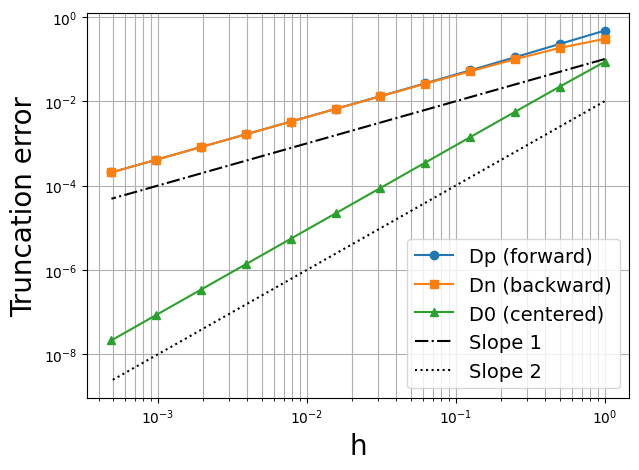


Forward difference (Dp):
           h     res_p   ratio_p
0   1.000000  0.472476       NaN
1   0.500000  0.228254  1.049599
2   0.250000  0.110248  1.049893
3   0.125000  0.053929  1.031605
4   0.062500  0.026639  1.017527
5   0.031250  0.013235  1.009204
6   0.015625  0.006596  1.004713
7   0.007812  0.003292  1.002384
8   0.003906  0.001645  1.001199
9   0.001953  0.000822  1.000601
10  0.000977  0.000411  1.000301
11  0.000488  0.000205  1.000151

Backward difference (Dn):
           h     res_n   ratio_n
0   1.000000  0.301169       NaN
1   0.500000  0.183789  0.712525
2   0.250000  0.099027  0.892159
3   0.125000  0.051118  0.953997
4   0.062500  0.025936  0.978878
5   0.031250  0.013059  0.989898
6   0.015625  0.006552  0.995063
7   0.007812  0.003281  0.997560
8   0.003906  0.001642  0.998787
9   0.001953  0.000821  0.999395
10  0.000977  0.000411  0.999698
11  0.000488  0.000205  0.999849

Centered difference (D0):
           h         res_0   ratio_0
0   1.000000  8.565359e-0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Functions
u = lambda x: np.sin(x)
du = lambda x: np.cos(x)

x0 = 1
hvec = 1.0 / 2.0**np.arange(12)

res_p = []
res_n = []
res_0 = []

for h in hvec:
    x = np.array([x0 - h, x0, x0 + h])

    Dp = np.array([0, -1, 1]) / h    # forward difference stencil
    Dn = np.array([-1, 1, 0]) / h    # backward difference stencil
    D0 = np.array([-1/2, 0, 1/2]) / h  # centered difference stencil

    du_p = np.dot(Dp, u(x))
    du_n = np.dot(Dn, u(x))
    du_0 = np.dot(D0, u(x))

    res_p.append(abs(du(x0) - du_p))
    res_n.append(abs(du(x0) - du_n))
    res_0.append(abs(du(x0) - du_0))

res_p = np.array(res_p)
res_n = np.array(res_n)
res_0 = np.array(res_0)

# Convergence plots with slope reference lines
plt.figure(figsize=(7, 5))
plt.loglog(hvec, res_p, 'o-', label="Dp (forward)")
plt.loglog(hvec, res_n, 's-', label="Dn (backward)")
plt.loglog(hvec, res_0, '^-', label="D0 (centered)")

plt.loglog(hvec, 0.1*hvec**1, 'k-.', label="Slope 1")
plt.loglog(hvec, 0.01*hvec**2, 'k:', label="Slope 2")

plt.xlabel("h", fontsize=20)
plt.ylabel("Truncation error", fontsize=20)
plt.legend(fontsize=14, loc="lower right")
plt.grid(True, which="both")
plt.show()


# Ratios of convergence
ratio_p = np.concatenate([[np.nan], -np.log2(res_p[1:] / res_p[:-1])])
ratio_n = np.concatenate([[np.nan], -np.log2(res_n[1:] / res_n[:-1])])
ratio_0 = np.concatenate([[np.nan], -np.log2(res_0[1:] / res_0[:-1])])

# Tables
T_p = pd.DataFrame({"h": hvec, "res_p": res_p, "ratio_p": ratio_p})
T_n = pd.DataFrame({"h": hvec, "res_n": res_n, "ratio_n": ratio_n})
T_0 = pd.DataFrame({"h": hvec, "res_0": res_0, "ratio_0": ratio_0})

print("\nForward difference (Dp):")
print(T_p)
print("\nBackward difference (Dn):")
print(T_n)
print("\nCentered difference (D0):")
print(T_0)



## General approaches for deriving FD stencils


Given $N+1$ points $(x_0,u(x_0)), (x_1,u(x_1)), \ldots, (x_{N},u(x_{N}))$, Finite difference (FD) formulas approximate  

$$
\left.\frac{d^k u}{dx^k}\right|_{x=x_j} \approx \sum_{i=0}^N w_i u(x_i), \qquad N \geq k+1,
$$  

where $w_i$ are FD weights.

### Interpolating Polynomials

One way to derive finite difference approximations is by finding an interpolating polynomial through the given stencil and differentiating that directly.  Given $N+1$ points $(x_0,u(x_0)), (x_1,u(x_1)), \ldots, (x_{N},u(x_{N}))$ assuming the $x_i$ are all unique, the interpolating polynomial $P_N(x)$ can be written as

$$
    P_N(x) = \sum^{N}_{i=0} u(x_i) \ell_i(x)
$$

where

$$
    \ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}
$$
Note that $\ell_i(x_i) = 1$ and $\forall j\neq i, ~~ \ell_i(x_j) = 0$.  

Since we know how to differentiate a polynomial we should be able to then compute the given finite difference approximation given these data points.


#### Example: 2-Point Stencil

Say we have two points to form the approximation to the derivative with.  The interpolating polynomial through two points is a linear function with the form
$$
    P_1(x) = u(x_0) \frac{x - x_1}{x_0 - x_1} + u(x_1) \frac{x - x_0}{x_1 - x_0}.
$$
Derive the approximation centered at $x_0$ from this polynomial.
Differentiating $P_1(x)$ leads to
$$
    P'_1(x) = u(x_0) \frac{1}{x_0 - x_1} + u(x_1) \frac{1}{x_1 - x_0}.
$$
If we allow the spacing between $x_0$ and $x_1$ to be $\Delta x = x_1 - x_0$ we can then write this as
$$
    P'_1(x) = \frac{u(x_1) - u(x_0)}{\Delta x}
$$
which is the general form of $D_-u(x)$ and $D_+u(x)$ above.



#### Example: 3-Point Stencil

If we extend this to have three points we have the interpolating polynomial
$$
    P_2(x) = u(x_0) \frac{x - x_1}{x_0 - x_1} \frac{x - x_2}{x_0 - x_2} + u(x_1) \frac{x - x_0}{x_1 - x_0} \frac{x - x_2}{x_1 - x_2} + u(x_2) \frac{x - x_0}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1}.
$$
Differentiating this leads to
$$\begin{aligned}
    P'_2(x) &= u(x_0) \left( \frac{1}{x_0 - x_1} \frac{x - x_2}{x_0 - x_2} + \frac{x - x_1}{x_0 - x_1} \frac{1}{x_0 - x_2}\right )+ u(x_1) \left ( \frac{1}{x_1 - x_0} \frac{x - x_2}{x_1 - x_2} + \frac{x - x_0}{x_1 - x_0} \frac{1}{x_1 - x_2} \right )+ u(x_2)\left ( \frac{1}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1} + \frac{x - x_0}{x_2 - x_0} \frac{1}{x_2 - x_1} \right ) \\
    &= u(x_0) \left(\frac{x - x_2}{2 \Delta x^2} + \frac{x - x_1}{2 \Delta x^2} \right )+ u(x_1) \left ( \frac{x - x_2}{-\Delta x^2} + \frac{x - x_0}{-\Delta x^2} \right )+ u(x_2)\left ( \frac{x - x_1}{2\Delta x^2} + \frac{x - x_0}{2 \Delta x^2} \right ) \\
    &=\frac{u(x_0)}{2\Delta x^2} (2x - x_2 - x_1)+ \frac{u(x_1)}{-\Delta x^2} ( 2x - x_2 - x_0)+ \frac{u(x_2)}{2\Delta x^2}( 2x - x_1 - x_0) \\
    &=\frac{u(x_0)}{2\Delta x^2} (2x - x_2 - x_1)+ \frac{u(x_1)}{-\Delta x^2} ( 2x - x_2 - x_0)+ \frac{u(x_2)}{2\Delta x^2}( 2x - x_1 - x_0).
\end{aligned}$$
If we now evaluate the derivative at $x_1$, assuming this is the central point, we have
$$\begin{aligned}
    P'_2(x_1) &= \frac{u(x_0)}{2\Delta x^2} (x_1 - x_2)+ \frac{u(x_1)}{-\Delta x^2} ( x_1 - x_2 + x_1 - x_0)+ \frac{u(x_2)}{\Delta x^2}( x_1 - x_0) \\
    &= \frac{u(x_0)}{2\Delta x^2} (-\Delta x)+ \frac{u(x_1)}{-\Delta x^2} ( -\Delta x + \Delta x)+ \frac{u(x_2)}{\Delta x^2}( 2\Delta x) \\
    &= \frac{u(x_2) - u(x_0)}{2 \Delta x}.
\end{aligned}$$

### Taylor-Series Methods

Another way to derive finite difference approximations can be computed by using the Taylor series and the method of undetermined coefficients.

$$u(x) = u(x_n) + (x - x_n) u'(x_n) + \frac{(x - x_n)^2}{2!} u''(x_n) + \frac{(x - x_n)^3}{3!} u'''(x_n) + \mathcal{O}((x - x_n)^4)$$
Say we want to derive the second order accurate, first derivative approximation that just did, this requires the values $(x_{n+1}, u(x_{n+1}))$ and $(x_{n-1}, u(x_{n-1}))$.  We can express these values via our Taylor series approximation above as

$$\begin{aligned}
    u(x_{n+1}) &= u(x_n) + (x_{n+1} - x_n) u'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} u''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} u'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
    &= u(x_n) + \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) + \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}$$
and

$$\begin{aligned}
    u(x_{n-1}) &= u(x_n) + (x_{n-1} - x_n) u'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} u''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} u'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4) \\
&= u(x_n) - \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) - \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}$$


#### Example: First Order Derivative

Now to find out how to combine these into an expression for the derivative we assume our approximation looks like

$$u'(x_n) + R(x_n) = A u(x_{n+1}) + B u(x_n) + C u(x_{n-1})$$

where $R(x_n)$ is our error.  

Plugging in the Taylor series approximations we find

$$u'(x_n) + R(x_n) = A \left ( u(x_n) + \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) + \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4)\right ) + B u(x_n) + C \left ( u(x_n) - \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) - \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4) \right )$$
Since we want $R(x_n) = \mathcal{O}(\Delta x^2)$ we want all terms lower than this to disappear except for those multiplying $u'(x_n)$ as those should sum to 1 to give us our approximation.  Collecting the terms with common derivatives $u^{(k)}(x_n)$ together we get a series of expressions for the coefficients $A$, $B$, and $C$ based on the fact we want an approximation to $u'(x_n)$.  The $n=0$ terms collected are $A + B + C$ and are set to 0 as we want the $u(x_n)$ term to disappear

$$\begin{aligned}
    u(x_n): & \quad A + B + C = 0 \\
    u'(x_n): & \quad A \Delta x - C \Delta x = 1  \\
    u''(x_n): & \quad A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} = 0
\end{aligned}$$
This last equation $\Rightarrow A = -C$, using this in the second equation gives $A = \frac{1}{2 \Delta x}$ and $C = -\frac{1}{2 \Delta x}$.  The first equation then leads to $B = 0$.  Putting this altogether then gives us our previous expression including an estimate for the error:

$$u'(x_n) + R(x_n) = \frac{u(x_{n+1}) - u(x_{n-1})}{2 \Delta x} + \frac{1}{2 \Delta x} \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4) + \frac{1}{2 \Delta x} \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4) $$

$$R(x_n) = \frac{\Delta x^2}{3!} u'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)$$

#### Example: Second Order Derivative

Using our Taylor series approach lets derive the second order accurate second derivative formula.  Again we will use the same points and the Taylor series centered at $x = x_n$ so we end up with the same expression as before:

$$\begin{aligned}
    u''(x_n) + R(x_n) &= \quad A \left ( u(x_n) + \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) + \frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &\quad+ B u(x_n) \\
    &\quad+ C \left ( u(x_n) - \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) - \frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}$$

except this time we want to leave $u''(x_n)$ on the right hand side.  Doing the same trick as before we have the following expressions:

$$\begin{aligned}
    u(x_n): & \quad A + B + C = 0 \\
    u'(x_n): & \quad A \Delta x - C \Delta x = 0 \\
    u''(x_n): & \quad A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} = 1
\end{aligned}$$
The second equation implies $A = C$ which combined with the third implies

$$A = C = \frac{1}{\Delta x^2}$$

Finally the first equation gives

$$B = -\frac{2}{\Delta x^2}$$

leading to the final expression

$$\begin{aligned}
    u''(x_n) + R(x_n) &= \frac{u(x_{n+1}) - 2 u(x_n) + u(x_{n-1})}{\Delta x^2} \\
&\quad+ \frac{1}{\Delta x^2} \left(\frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n)  - \frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n)  \right) + \mathcal{O}(\Delta x^5)
\end{aligned}$$

with

$$R(x_n) = \frac{\Delta x^2}{12} u^{(4)}(x_n) + \mathcal{O}(\Delta x^3)$$


### Use of monomial test functions

This approach is based on enforcing 
$$
\left.\frac{d^k u}{dx^k}\right|_{x=x_j} \approx \sum_{i=0}^N w_i u(x_i), \qquad N \geq k+1,
$$  
to be exact for as high degree as possible. 

In our example, this is equivalent to enforce it exact for the monomials $\{1,x,x^2\}$. For simplicity, if the stencil center is $x_n$, let's shift the polynomials to $\{1,(x-x_n),(x-x_n)^2\}$, leading to
$$
\begin{aligned}
u = 1 
&\implies A \cdot 1 + B \cdot 1 + C \cdot 1 
= \left.(1)'\right|_{x_n} = 0 \\[6pt]
u = (x-x_n) 
&\implies A (x_n+\Delta x-x_n) + B (x_n-x_n) + C (x_n-\Delta x-x_n) 
= \left.(x-x_n)'\right|_{x=x_n} = 1 \\[6pt]
u = (x-x_n)^2 
&\implies A (x_n+\Delta x-x_n)^2 + B (x_n-x_n)^2 + C (x_n-\Delta x-x_n)^2  
= \left.[(x-x_n)^2]'\right|_{x=x_n} = 0
\end{aligned},
$$

which is equivalent to the system of equations obtained above using Taylor series expansions about $x_n$.



In the more general case of finding the weights $w_0, w_1, \dots , w_N$ to use at locations
$x_0, x_1, \dots, x_N$ for approximating a linear operator $L$ at some location $x = \bar{x}$, we similarly solve the system
\begin{equation*}
\begin{bmatrix}
1 & 1 & \dots & 1\\
x_0 & x_1 & \dots & x_N \\
\vdots & \vdots & \ddots & \vdots\\
x_0^{N} & x_1^{N} & \dots & x_N^{N}
\end{bmatrix}
\begin{bmatrix}
w_0\\
w_1\\
\vdots\\
w_N
\end{bmatrix}
\begin{bmatrix}
\left.L1\right|_{x=\bar{x}}\\
\left.Lx\right|_{x=\bar{x}}\\
\vdots\\
\left.Lx^{N}\right|_{x=\bar{x}}
\end{bmatrix}
\end{equation*}
The successive lines of this system enforce that the set of weights lead to the correct result
for the functions $\{1, x, x^2, \dots, x^{N}\}$ and thus, by linearity, for all polynomials up through
degree $N$. This direct linear systems approach is very flexible and easy to implement. However, it is not computationally fast ($O(N^3)$ operations), and the coefficient matrix can become ill-conditioned.

## **Task: Finite Difference Weights with Validation**

Your task is to write a program that computes the finite difference coefficients for approximating derivatives at a point using *monomial test functions*, and then **validate your results against tabulated coefficients (from Wikipedia)**.

Reference: [Finite difference coefficients (Wikipedia)](https://en.wikipedia.org/wiki/Finite_difference_coefficient)

---

### **Function to implement**

**Function:** `FDweights(k, x0, x)`

**Input:**

* `k`  → order of the derivative to approximate
* `x0` → expansion point (where the derivative is evaluated)
* `x`  → list of stencil points

**Output:**

* `c` → list of weights for the linear combination of function values

---

### **Part A – Implementation**

Implement the function `FDweights` that, given a derivative order `k`, a point `x0`, and a set of stencil points `x`, returns the finite difference weights. Use the monomial test function approach.

---

### **Part B – Convergence test**

Use your function in a convergence experiment:

* Choose a smooth test function, e.g. $u(x) = \sin(x)$ with derivative $u'(x) = \cos(x)$.
* For different step sizes $h$, compute the finite difference approximation of $u'(x_0)$.
* Measure the error and plot it in log-log scale.
* Compare the observed convergence rates with the expected slopes.

A code template is given below for the convergence test:

```python
import numpy as np
import matplotlib.pyplot as plt

def convergence(x0, ns, hvec, u, du, k):
    res = []
    for h in hvec:
        stencil = np.arange(-(ns - 1) // 2, (ns - 1) // 2 + 1)
        x = x0 + stencil * h
        c = FDweights(k, x0, x)
        dun = np.dot(c, u(x))
        res.append(abs(du(x0) - dun))
    return res

# Example test function
u = lambda x: np.sin(x)
du = lambda x: np.cos(x)

x0 = 1
hvec = 1.0 / 2**np.arange(30)
ns = 3

res = convergence(x0, ns, hvec, u, du, 1)

# Plot results
plt.loglog(hvec, res, 'o-', label="Error")
plt.loglog(hvec, 0.1*hvec**1, 'k:', label="Slope 1")
plt.loglog(hvec, 0.01*hvec**2, 'g:', label="Slope 2")
plt.loglog(hvec, 0.01*hvec**3, 'm:', label="Slope 3")
plt.loglog(hvec, 0.001*hvec**4, 'c:', label="Slope 4")
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Finite Difference Error")
plt.legend(fontsize=12, loc="lower right")
plt.grid(True, which="both")
plt.xlim(1e-10, 10)
plt.ylim(1e-16, 1)
plt.show()
```

---

### **Part C – Validation against tabulated formulas**

You must **check that your computed weights match the expected convergence rates** up to 4th order derivative and 4th degree of accuracy.

Reference: [Finite difference coefficients (Wikipedia)](https://en.wikipedia.org/wiki/Finite_difference_coefficient)




## Polynomial View: Error Analysis

Given $N + 1$ points we can form an interpolant $P_N(x)$ of degree $N$ where

$$u(x) = P_N(x) + R_N(x)$$
We know from Lagrange's Theorem that the remainder term looks like

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})(x - x_{N+1}) \frac{u^{(N+1)}(c)}{(N+1)!}$$

noting that we need to require that $u(x) \in C^{N+1}$ on the interval of interest.  Taking the derivative of the interpolant $P_N(x)$ (in terms of Newton polynomials) then leads to

$$\begin{aligned}
    P_N'(x) &= [u(x_0), u(x_1)] + ((x - x_1) + (x - x_0)) [u(x_0), u(x_1), u(x_2)]+ \cdots \\
    &\quad  + \left(\sum^{N-1}_{i=0}\left( \prod^{N-1}_{j=0,~j\neq i} (x - x_j) \right )\right ) [u(x_0), u(x_1), \ldots, u(x_N)]
\end{aligned}$$
Similarly we can find the derivative of the remainder term $R_N(x)$ as

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{u^{(N+1)}(c)}{(N+1)!}$$
Now if we consider the approximation of the derivative evaluated at one of our data points $(x_k, y_k)$ these expressions simplify such that

$$u'(x_k) = P_N'(x_k) + R_N'(x_k)$$
If we let $\Delta x = \max_i |x_k - x_i|$ we then know that the remainder term will be $\mathcal{O}(\Delta x^N)$ as $\Delta x \rightarrow 0$ thus showing that this approach converges and we can find arbitrarily high order approximations.


 ## Rounding Error 

Let's repeat the first numerical experiment with $D_0$ for smaller $h$ values: 


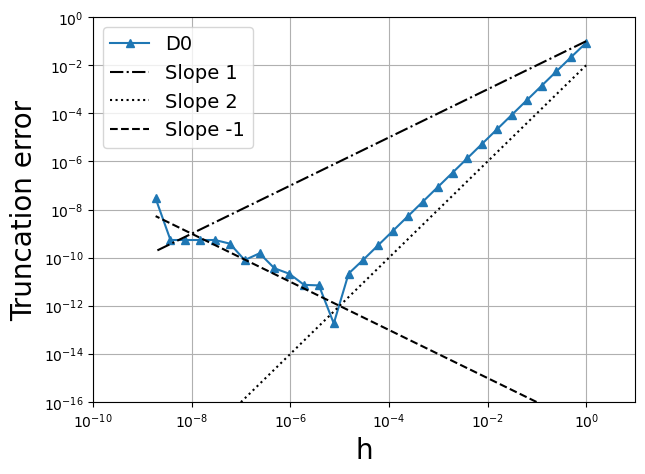

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Functions
u = lambda x: np.sin(x)
du = lambda x: np.cos(x)

x0 = 1
hvec = 1.0 / 2.0**np.arange(30)
res = []

for h in hvec:
    x = np.array([x0 - h, x0, x0 + h])
    D0 = np.array([-1/2, 0, 1/2]) / h  # centered difference stencil
    du0 = np.dot(D0, u(x))
    res.append(abs(du(x0) - du0))

res = np.array(res)

# Convergence plots with slope reference lines
plt.figure(figsize=(7, 5))
plt.loglog(hvec, res, '^-', label="D0")

plt.loglog(hvec, 0.1*hvec**1, 'k-.', label="Slope 1")
plt.loglog(hvec, 0.01*hvec**2, 'k:', label="Slope 2")
plt.loglog(hvec, 1e-17/hvec**1, 'k--', label = "Slope -1")

plt.xlabel("h", fontsize=20)
plt.ylabel("Truncation error", fontsize=20)
plt.legend(fontsize=14, loc="upper left")
plt.grid(True, which="both")
plt.xlim(1e-10, 10) 
plt.ylim(1e-16, 1)  
plt.show()

We note the following: initially, as $h$ decreases, the error diminishes, closely adhering to the expected errors $O\left(h^{2}\right)$ for the three-point centered-difference formula $D_0$. However, we observe a deterioration in the approximations as $h$ decreases further. The reason for this loss of accuracy with very small $h$ values is due to loss of significance. Both formulas subtract nearly equal numbers, causing a loss of significant digits, which is then compounded by division by a small number.

To gain insight into the susceptibility of numerical differentiation formulas to loss of significance, we scrutinize the three-point centered-difference formula.

Let $\hat{f}(x+h)$ denote the floating point version of the input $f(x+h)$, differing from the correct value $f(x+h)$ by an amount on the order of machine epsilon in relative terms. Assuming function values are of the order of 1, both relative and absolute errors are approximately equal.

Given $\hat{f}(x+h)=f(x+h)+\epsilon_{1}$ and $\hat{f}(x-h)=f(x-h)+\epsilon_{2}$, where $\left|\epsilon_{1}\right|,\left|\epsilon_{2}\right| \approx \epsilon_{\text {mach }}$, the difference between the correct $f^{\prime}(x)$ and the machine version of the three-point centered-difference formula is:
$$
\begin{aligned}
f^{\prime}(x)_{\text {correct }}-f^{\prime}(x)_{\text {machine }} & =f^{\prime}(x)-\frac{\hat{f}(x+h)-\hat{f}(x-h)}{2 h} \\
& =f^{\prime}(x)-\frac{f(x+h)+\epsilon_{1}-\left(f(x-h)+\epsilon_{2}\right)}{2 h} \\
& =\left(f^{\prime}(x)-\frac{f(x+h)-f(x-h)}{2 h}\right)+\frac{\epsilon_{2}-\epsilon_{1}}{2 h} \\
& =\left(f^{\prime}(x)_{\text {correct }}-f^{\prime}(x)_{\text {formula }}\right)+\text { error }_{\text {rounding }}
\end{aligned}
$$

We can interpret the total error as a sum of the truncation error, representing the difference between the correct derivative and the correct approximating formula, and the rounding error, accounting for the loss of significance in the computer-implemented formula. The absolute value of the rounding error is:
$$
\left|\frac{\epsilon_{2}-\epsilon_{1}}{2 h}\right| \leq \frac{2 \epsilon_{\mathrm{mach}}}{2 h}=\frac{\epsilon_{\mathrm{mach}}}{h}
$$

where $\epsilon_{\text {mach }}$ signifies machine epsilon. Hence, the absolute value of the error of the machine approximation of $f^{\prime}(x)$ is bounded above by:
\begin{equation*}
E(h) \equiv \frac{h^{2}}{6} f^{\prime \prime \prime}(x_0)+\frac{\epsilon_{\mathrm{mach}}}{h}.
\end{equation*}

Previously, we had solely considered the first term of the error, the mathematical error. However, the preceding analysis prompts us to also consider the term representing loss of significance.

The minimum of $E(h)$ arises from solving:
\begin{equation*}
0=E^{\prime}(h)=-\frac{\epsilon_{\mathrm{mach}}}{h^{2}}+\frac{M}{3} h
\end{equation*}

where $\left|f^{\prime \prime \prime}(x_0)\right|$ is approximated by $M$. This yields:
$$
h=\left(3 \epsilon_{\mathrm{mach}} / M\right)^{1 / 3}
$$

as the increment size $h$ that minimizes the overall error, accounting for the effects of computer rounding. In double precision, for the aforementioned example, this is approximately $\epsilon_{\text {mach }}^{1 / 3} \approx 10^{-5}$, consistent with the observed solution.

The key takeaway is that the three-point centered-difference formula enhances in accuracy as $h$ decreases until $h$ becomes approximately the size of the cube root of machine epsilon. As $h$ decreases below this threshold, the error may begin increasing again. Similar analyses on rounding can be conducted for other formulas.

--- 

## Exercises

1. Do **Task:** Finite Difference Weights. 

2. Show that $$D_3 u(\bar{x}) \equiv \frac{1}{6h} \left[2u(\bar{x} + h) + 3u(\bar{x}) - 6u(\bar{x} - h) + u(\bar{x}-2h)\right]$$ is $O(h^3)$ accurate.

3. Obtain the FD formula that approximates the second derivative $u''(x)$ using the data $u(\bar{x})$, $u(\bar{x}+h)$ and $u(\bar{x}-h)$.

4. Derive a difference formula for the fourth derivative of $f$ at $x_0$ using Taylor's expansions at $x_0 \pm h$ and $x_0 \pm 2h$. How many points will be used in total and what is the expected order of the resulting formula?

5. Suppose that the points $x_{-1}$, $x_0 = x_{-1} + h_0$ , and $x_1 = x_0 + h_1$ are to be used to derive a second order formula for $f'(x_0)$ which holds even when $h_0 = h_1$.
    - Obtain the corresponding FD formula by means of the Lagrange interpolating polynomials.
    - Show that for $h_0 = h_1 = h$ this becomes the familiar centered three-point formula.
    - Set $h_1 = h$ and $h_0 = 0.5h$. Compute the convergence rate of this formula numerically (for instance, by means of approximating the first derivative of the test function $f(x) = e^x$ at $x=0$). Can you proof this result analytically?
\end{enumerate}

6. Use the method of undetermined coefficients to find a fourth-order accurate finite difference approximation to $u''(x)$ based on 5 equally spaced points, 
$$
u''(x) = c_{-2}u(x-2h) + c_{-1} u(x-h) + c_0 u(x) + c_1 u(x + h) + c_2 u(x+2h) + O(h^4).
$$ 
Test your formula on some smooth function to verify that it gives the expected accuracy. 
